<a href="https://colab.research.google.com/github/rjaa2020/projects/blob/main/multiclass_obesity_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Data Loading

In [2]:
from google.colab import files
import zipfile

!pip install kaggle

files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c playground-series-s4e2

# Specify the path to the zip file
zip_file_path = '/content/playground-series-s4e2.zip'

# Specify the directory where you want to extract the files
extract_to_directory = '/content/'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extract_to_directory)


Saving kaggle.json to kaggle.json
  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 166MB/s]


In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
train = pd.read_csv("/content/train.csv")
train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
# Load the dataset into a DataFrame
df = pd.read_csv('/content/train.csv')

# Split the data into features and target variable
X = df.drop(columns=['NObeyesdad'])
X = pd.get_dummies(X)

scaler = MinMaxScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [6]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(max_depth = 4)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7608381502890174


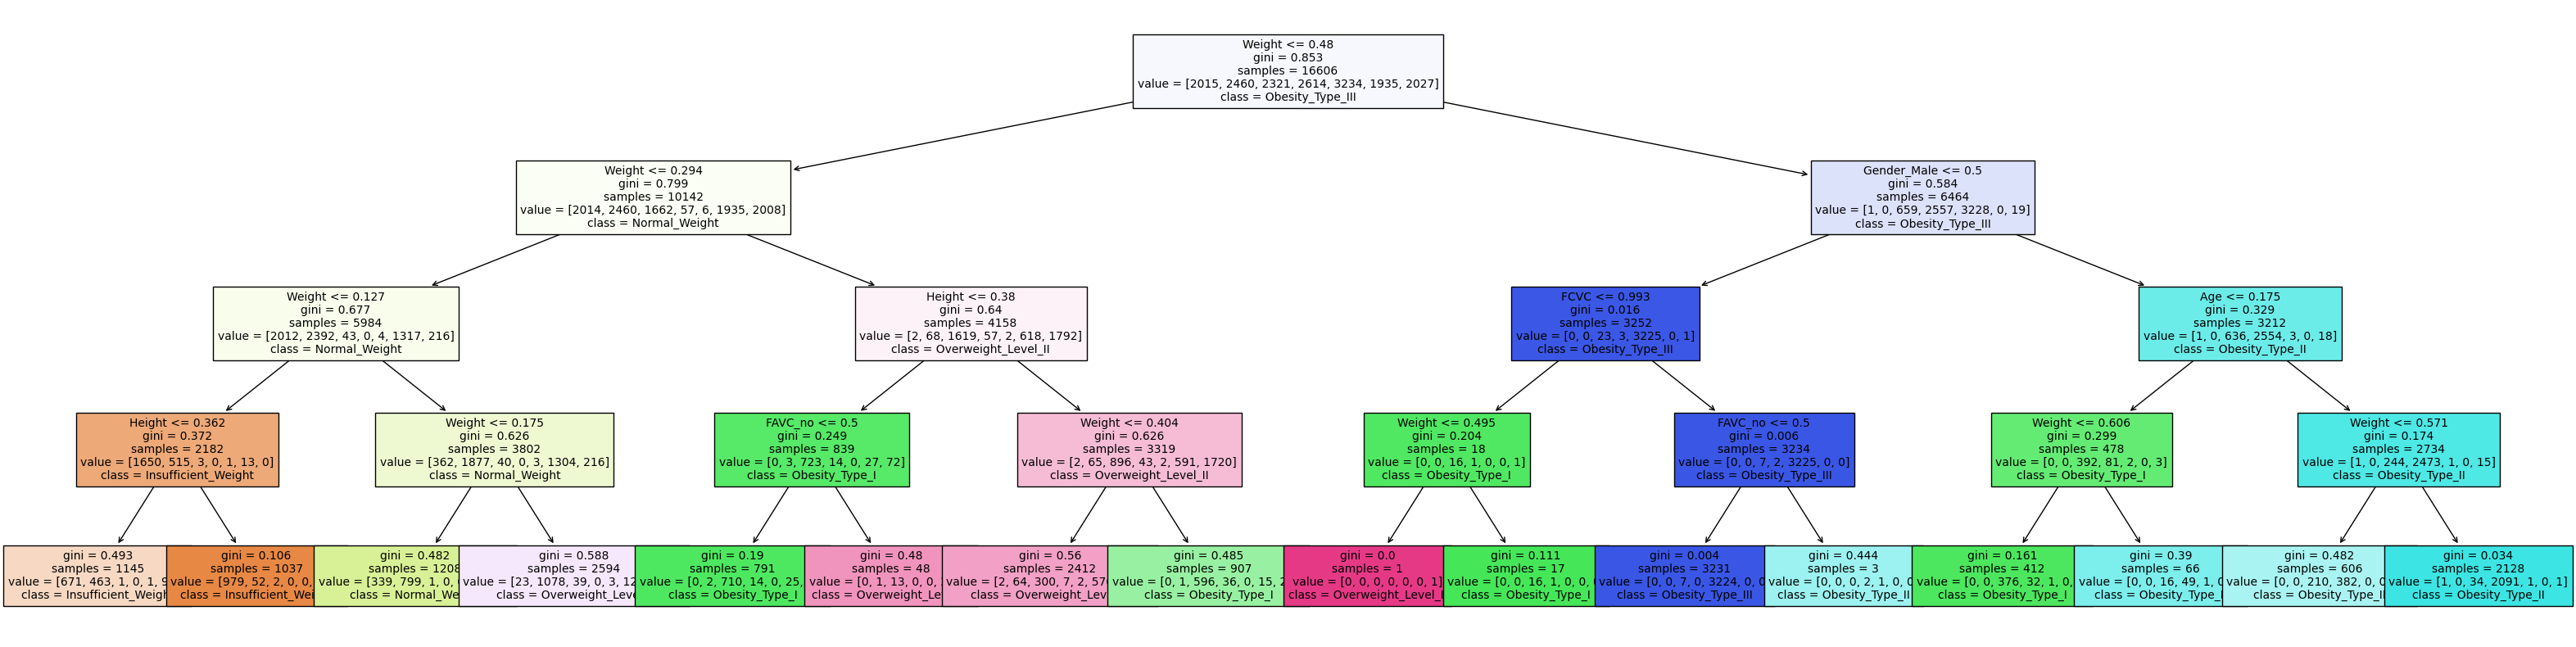

In [7]:
# Visualize the decision tree
plt.figure(figsize=(40,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, fontsize=10)
plt.show()

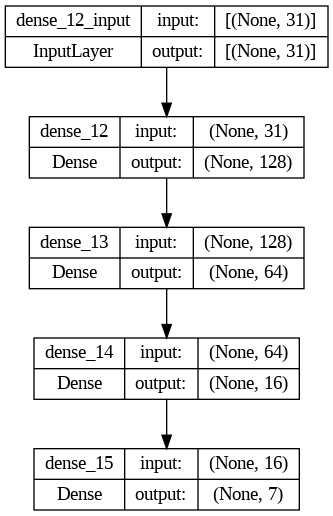

In [15]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[-1],)),
    Dense(units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=y_train.shape[1], activation='sigmoid')
])

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Epoch 1/100
104/104 - 1s - loss: 1.3694 - accuracy: 0.5090 - val_loss: 0.9569 - val_accuracy: 0.6183 - 958ms/epoch - 9ms/step
Epoch 2/100
104/104 - 0s - loss: 0.8111 - accuracy: 0.6843 - val_loss: 0.6768 - val_accuracy: 0.7339 - 206ms/epoch - 2ms/step
Epoch 3/100
104/104 - 0s - loss: 0.6236 - accuracy: 0.7640 - val_loss: 0.5941 - val_accuracy: 0.7766 - 171ms/epoch - 2ms/step
Epoch 4/100
104/104 - 0s - loss: 0.5292 - accuracy: 0.8044 - val_loss: 0.4887 - val_accuracy: 0.8266 - 206ms/epoch - 2ms/step
Epoch 5/100
104/104 - 0s - loss: 0.4761 - accuracy: 0.8261 - val_loss: 0.4451 - val_accuracy: 0.8447 - 175ms/epoch - 2ms/step
Epoch 6/100
104/104 - 0s - loss: 0.4485 - accuracy: 0.8393 - val_loss: 0.4290 - val_accuracy: 0.8492 - 204ms/epoch - 2ms/step
Epoch 7/100
104/104 - 0s - loss: 0.4316 - accuracy: 0.8482 - val_loss: 0.4256 - val_accuracy: 0.8510 - 183ms/epoch - 2ms/step
Epoch 8/100
104/104 - 0s - loss: 0.4225 - accuracy: 0.8505 - val_loss: 0.4151 - val_accuracy: 0.8537 - 172ms/epoch - 2

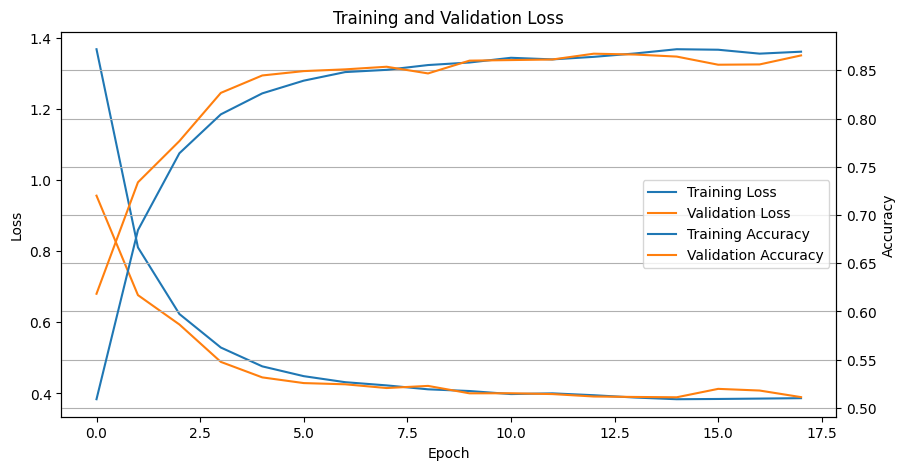

In [17]:
# Create a single figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot loss on the first subplot (left y-axis)
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='y')
ax1.set_title('Training and Validation Loss')

# Create a second y-axis for accuracy on the same subplot
ax2 = ax1.twinx()
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.tick_params(axis='y')

# Show legend for accuracy on the right side of the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.grid(True)
plt.show()